# Residential Photovoltaic Installations

In [14]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import scipy.stats as stats


In [15]:
plt.style.use('seaborn-white')
rcParams['axes.labelsize'] = 'x-large'
rcParams['axes.edgecolor'] = 'black'
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlesize'] = 'x-large'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.xmargin'] = 0.02
rcParams['axes.ymargin'] = 0.02
            
rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = ':'
rcParams['grid.alpha'] = 0.2
rcParams['grid.color'] = 'black'
          
rcParams['figure.titlesize'] = 'x-large'
rcParams['figure.edgecolor']= 'black'
rcParams['figure.facecolor'] = 'white'
rcParams['figure.figsize'] = [12, 8]

rcParams['ytick.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 'large'

In [16]:
print(os.getcwd())

C:\Users\smouz\Google Drive\jupyter_notebook\projects\solar_array


In [17]:
# read
residential_pv = pd.read_csv('pv_df_clean_2.csv', sep=',', low_memory=False)

In [56]:
residential_pv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612172 entries, 0 to 612171
Data columns (total 35 columns):
date_installed                 612172 non-null object
state                          612172 non-null object
incentive_prog_names           459717 non-null object
size_kw                        612172 non-null float64
zipcode                        612172 non-null int64
install_type                   612172 non-null object
installer                      401915 non-null object
cost_per_watt                  612168 non-null float64
cost                           612172 non-null float64
city                           461178 non-null object
utility_clean                  457662 non-null object
tech_1                         358820 non-null object
model1_clean                   358820 non-null object
county                         608230 non-null object
annual_pv_prod                 612172 non-null float64
annual_insolation              612167 non-null float64
rebate               

## Correlation of Cost and Size
Explore the relationship between the two variables, did this correlation occur purely by chance?

In [18]:
# =============================================================================
# Correlation of Cost and Size
# =============================================================================
# explore the relationship, did this correlation occur PURELY BY CHANCE?
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

def bootstrap_replicate_1d(data, func):
    '''
    Generate boostrap replicate of one-dim data.
    
    Returns:
    --------
        computed func of the bootstrap sample
    '''
    return func(np.random.choice(data, len(data)))

# generate many bootstrap replicates from the data set
def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates and compute func.
    Returns:
    --------
        bootstrap replicate array
    """
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

def permutation_sample(data1, data2):
    """
    Generate a permutation sample from two data sets
    
    """
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

# pick columns for 3rd dimension
def generate_palette(columnName, df=residential_pv):
    """
    Generate a palette and hue given a categorical column from the data.
    Returns a tuple of hue and palette
    """
    numColors = df[columnName].nunique()
    h = df[columnName]
    pal = sns.hls_palette(numColors, l=.4, s=.6)
#     pal = sns.mpl_palette('Spectral_r',numColors)
    return h, pal


In [19]:
# residential_pv.dropna(axis=1, how='all').reset_index(drop=True).info()



In [20]:
# copy the original DF and remove missing values
clean_pv = residential_pv.copy()
# where cost values are missing, replace all values to nan
clean_pv[clean_pv['cost'].isnull().values] = np.nan
# drop all missing values
clean_pv = residential_pv.dropna(axis=0, how='all').reset_index(drop=True)
# clean_pv.info()


In [21]:
print(pearson_r(clean_pv['size_kw'].values, clean_pv['total_cost']))
print(pearson_r(clean_pv['annual_pv_prod'].values, clean_pv['total_cost']))
print(pearson_r(clean_pv['cost_per_watt'], clean_pv['total_cost']))
clean_pv.corr()[clean_pv.corr() > 0.4]



0.7395585227929651
0.7123165045294357
nan


,size_kw,zipcode,cost_per_watt,cost,annual_pv_prod,annual_insolation,rebate,sales_tax_cost,tilt1,azimuth1,...,total_cost,area_est,power_density,rebate_cost_ratio,sales_tax_percent,month,day,year,cost_mo_agg_med,month_install_cnt
size_kw,1.000000,NaN,NaN,0.739559,0.958230,NaN,NaN,0.413428,NaN,NaN,...,0.739559,0.987278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipcode,NaN,1.000000,NaN,NaN,NaN,0.733456,NaN,NaN,NaN,NaN,...,NaN,NaN,0.733456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_per_watt,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost,0.739559,NaN,NaN,1.000000,0.712317,NaN,0.430872,0.554500,NaN,NaN,...,1.000000,0.718297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_pv_prod,0.958230,NaN,NaN,0.712317,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.712317,0.925344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_insolation,NaN,0.733456,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rebate,NaN,NaN,NaN,0.430872,NaN,NaN,1.000000,NaN,NaN,NaN,...,0.430872,NaN,NaN,0.798229,NaN,NaN,NaN,NaN,0.542781,NaN
sales_tax_cost,0.413428,NaN,NaN,0.554500,NaN,NaN,NaN,1.000000,NaN,NaN,...,0.554500,0.424763,NaN,NaN,0.800466,NaN,NaN,NaN,NaN,NaN
tilt1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
azimuth1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot Linear Regression

In [22]:
# sunlight_hrs_theo = (clean_pv['annual_pv_prod'] / (clean_pv['size_kw'])) / 365
# sunlight_hrs_theo.describe()

In [23]:
# sns.palplot(sns.hls_palette(4, l=.3, s=.8))

In [24]:
# clean_pv.info()
clean_pv[clean_pv['annual_insolation'].isnull()][['state','county','annual_insolation']]

,state,county,annual_insolation
52667,ak,NaN,NaN
544267,ak,yukon-koyukuk,NaN
548282,ak,southeast fairbanks,NaN
548628,ak,matanuska-susitna,NaN
549095,ak,matanuska-susitna,NaN


In [25]:
h, pal = generate_palette('tracking_type')

color = sns.hls_palette(4, l=.3, s=.8)

scatter_settings = {'marker': 'o',
                    'hue': h,
                    'edgecolor': 'k',
#                     'palette': pal,
                    'legend': 'brief',
                    'alpha': 0.2,
                   }
# sns.scatterplot??

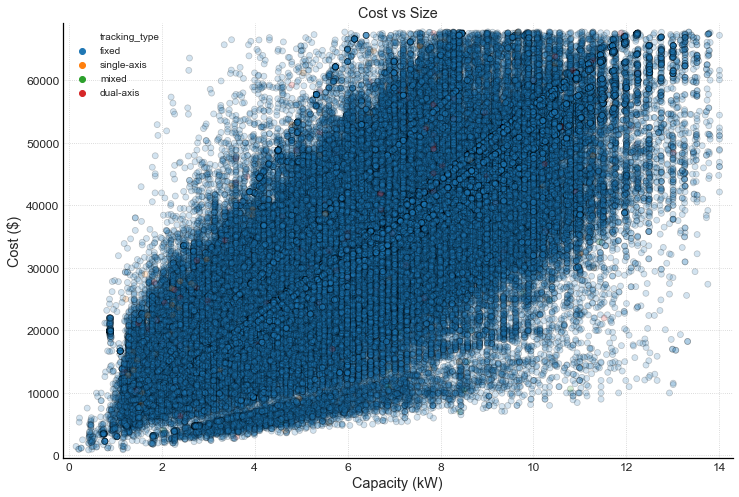

In [26]:
size = clean_pv['size_kw'].values
cost = clean_pv['cost'].values

# Plot
# plt.plot(size, cost, marker='.', linestyle='none', alpha=0.2, c=color[2])
sns.scatterplot(size, cost, **scatter_settings)
plt.margins(0.02)
plt.xlabel('Capacity (kW)')
plt.ylabel('Cost ($)')
plt.title('Cost vs Size')

plt.show()



slope = 11.900180898302876 change in price per kilowatt
intercept = 103.69824141484585 dollars


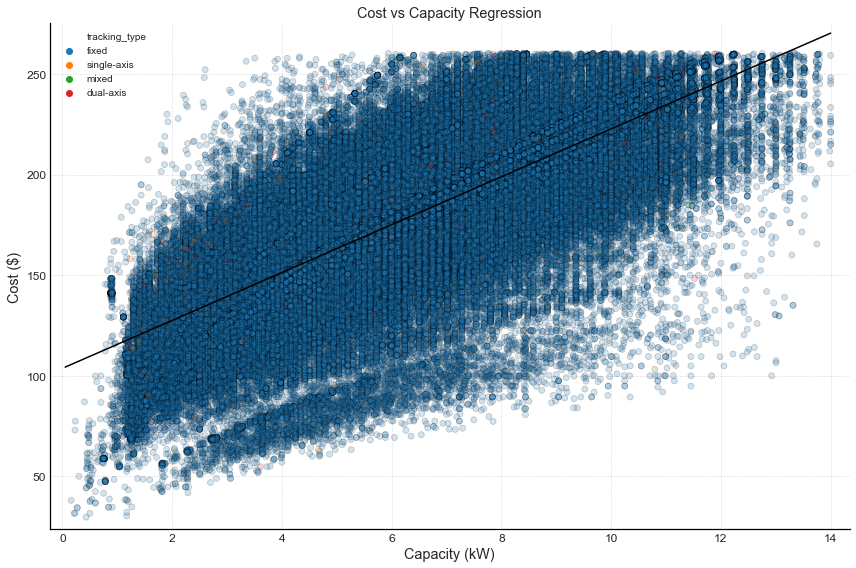

In [27]:
size = (clean_pv['size_kw'].values)
cost = (clean_pv['cost'].values) **(1/2)

# calculate slope and intercept
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(size, cost, deg=1)

# Print the results to the screen
print('slope =', a, 'change in price per kilowatt')
print('intercept =', b, 'dollars')

# Make theoretical line to plot
x = np.array([size.min(), size.max()])
y = a * x + b

# Add regression line to plot
plt.plot(x, y, color='black')
sns.scatterplot(size, cost, **scatter_settings)
plt.margins(0.02)
plt.xlabel('Capacity (kW)')
plt.ylabel('Cost ($)')
plt.title('Cost vs Capacity Regression')
plt.tight_layout()
plt.show()



In [28]:
# functions for individual states
date_time = '%Y-%m-%d'
datetime = pd.to_datetime(clean_pv['date_installed'], format=date_time)
pv_date = clean_pv.set_index(datetime)

def state_cost_cap(df, state_name, sys_cap, title=None, **kwargs):
    state = df[df['state'] == state_name]
    if len(state) < 1:
        print('No data available for state.')
    else:
        a, b = np.polyfit(state['size_kw'], state['cost'], deg=1)
        x = np.array([0,state['size_kw'].max()-1])
        y = a * x + b
        sns.scatterplot(state['size_kw'], state['cost'], marker='o',  alpha=0.3, **kwargs)
        plt.plot(x, y, color='black')
        plt.title(title)
        plt.xlabel('Cap')
        plt.ylabel('Cost ($)')
        plt.show()
        x = sys_cap
        y = a * x + b
        print('Amount of state data:  ', len(state))
        print('Correlation:           ', round(pearson_r(state['size_kw'], state['cost']), 4))
        
        print('\nSystem capacity:       ', x)
        print('Hardware cost:          ' + str('$') + str(round(y, 2)))
        
        print('\nslope:                 ', round(a, 2), 'change in price per kilowatt')
        print('intercept:             ', round(b,2), 'dollars')


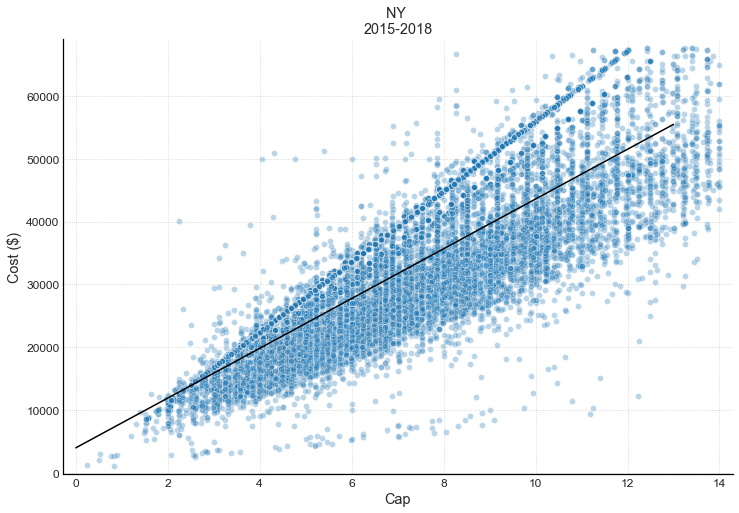

Amount of state data:   16526
Correlation:            0.8213

System capacity:        6
Hardware cost:          $27752.91

slope:                  3956.99 change in price per kilowatt
intercept:              4010.97 dollars


In [29]:
# filter by years,state and compare
state = 'ny'
years = '2015-2018'

state_cost_cap(pv_date['2015':'2018'],
               state_name=state,
               sys_cap=6,
               title=f'{state.upper()} \n{years}',
              )


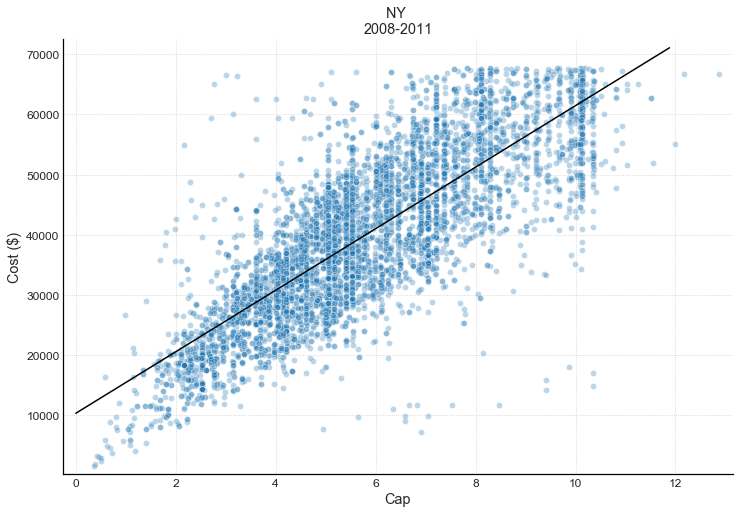

Amount of state data:   6479
Correlation:            0.8026

System capacity:        6
Hardware cost:          $41011.78

slope:                  5108.73 change in price per kilowatt
intercept:              10359.38 dollars


In [30]:
state = 'ny'
years = '2008-2011'
state_cost_cap(pv_date['2008':'2011'],
               state_name=state,
               sys_cap=6,
               title=f'{state.upper()} \n{years}',
              )

## Confidence Interval and Normality Test

Using the mean and standard deviation obtained from data we can compare the theoretical and actual distributions. We can plot the actual distribution using mean and standard deviation along side a theoretical distribution given the same parameters of mean and standard deviation. The results can then show whether our data is normally distributed, and if it is, then it makes life much easier. 

In [32]:
# =============================================================================
# Cost - Confidence Interval
# =============================================================================
def bs_reps_plot(data, func, c_int, size=100, xlabel='data', title=None, **kwargs):
    """
    Plot histogram of computed statistic (bootstrap replicate)
    
    Parameters:
    ----------
            data:  array of values
            func:  function to compute statistic
           c_int:  confidence interval (dtype: list)
            size:  sample size
        **kwargs:  additional keyword arguments to pass into the plt.hist function

    Returns:
    ----------
    Plots histogram
    Prints confidence interval values, mean and standard deviation of sample
    """
    data_bs_reps = draw_bs_reps(data, func, size)
    n_bins = int((len(data) ** (1/4)))
    conf_int = np.percentile(data_bs_reps, c_int)
    
    plt.hist(data_bs_reps,
             bins=n_bins,
             density=True,
             alpha=0.6,
             color=color[2],
             edgecolor='k',
#              cumulative=True,             
#              histtype='step',
             **kwargs
            )
    plt.xlabel(xlabel)
    plt.ylabel('PDF')
    plt.title(title)
    # draw confidence interval dashed lines
    plt.axvline(x=conf_int[0], color='k', linestyle='--')
    plt.axvline(x=conf_int[1], color='k', linestyle='--')
    plt.tight_layout()
    plt.show()
    
    print('Confidence interval:', conf_int)
    print('Mean of bootstrap reps:', np.mean(data_bs_reps))
    print('Standard Deviation of bootstrap reps:', np.std(data_bs_reps))
    

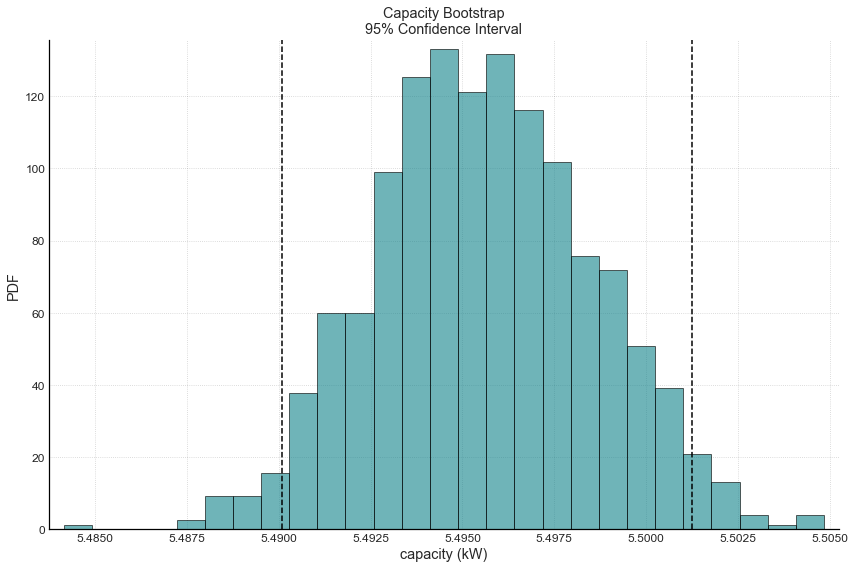

Confidence interval: [5.49009177 5.50125801]
Mean of bootstrap reps: 5.495574466968827
Standard Deviation of bootstrap reps: 0.002958478692706122


In [33]:
# plot capacity BS
bs_reps_plot(clean_pv['size_kw'],
             np.mean,
             [2.5, 97.5],
             1000,
             xlabel='capacity (kW)',
             title='Capacity Bootstrap\n95% Confidence Interval'
            )

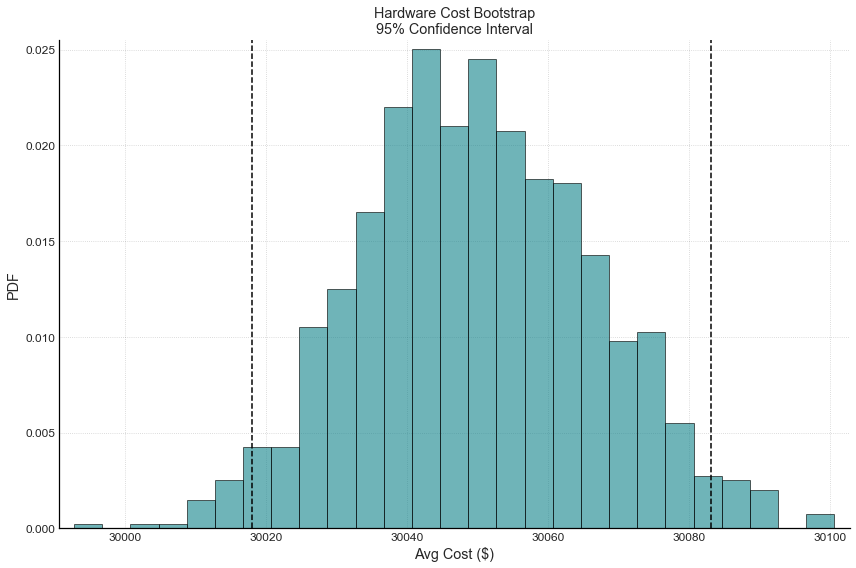

Confidence interval: [30018.00987456 30083.080434  ]
Mean of bootstrap reps: 30049.953353732628
Standard Deviation of bootstrap reps: 16.469263111512287


In [34]:
# hardware cost
bs_reps_plot(clean_pv['cost'],
             np.mean,
             [2.5, 97.5],
             1000,
             xlabel='Avg Cost ($)',
             title='Hardware Cost Bootstrap\n95% Confidence Interval'
            )

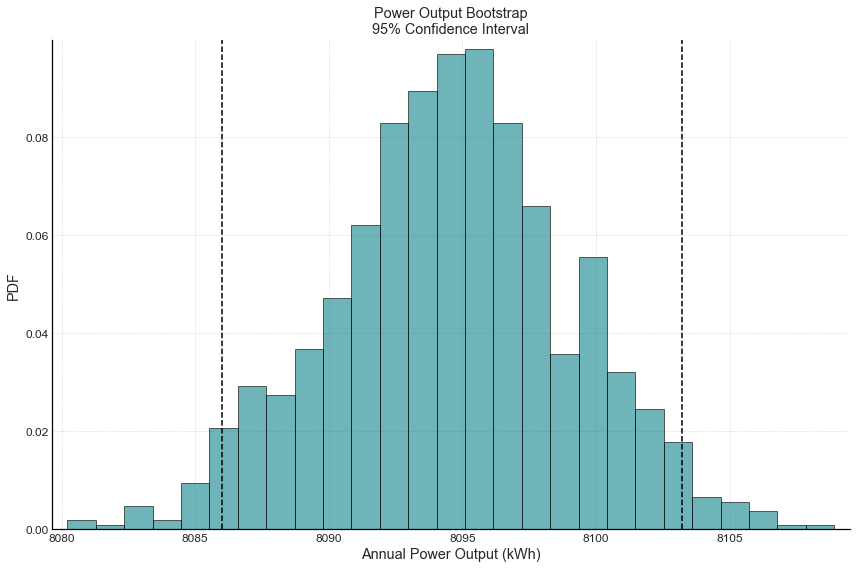

Confidence interval: [8085.98840349 8103.20577054]
Mean of bootstrap reps: 8094.607670734875
Standard Deviation of bootstrap reps: 4.470448570635603


In [35]:
# annual pv producuction
# cost = clean_pv['cost']
bs_reps_plot(clean_pv['annual_pv_prod'],
             np.mean,
             [2.5, 97.5],
             1000,
             xlabel='Annual Power Output (kWh)',
             title='Power Output Bootstrap\n95% Confidence Interval'
            )

In [36]:
def sample_normal(col_name, size=1, data=clean_pv):
    """
    Produce a sample normal distribution from computed statistics (mean, std) of actual data.
    
    Retuns:
    -------
        Array of normally distributed data
    """
    return np.random.normal(np.mean(data[col_name]),
                                    np.std(data[col_name]),
                                    size=1000
                           ) 

C:\Users\smouz\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\smouz\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


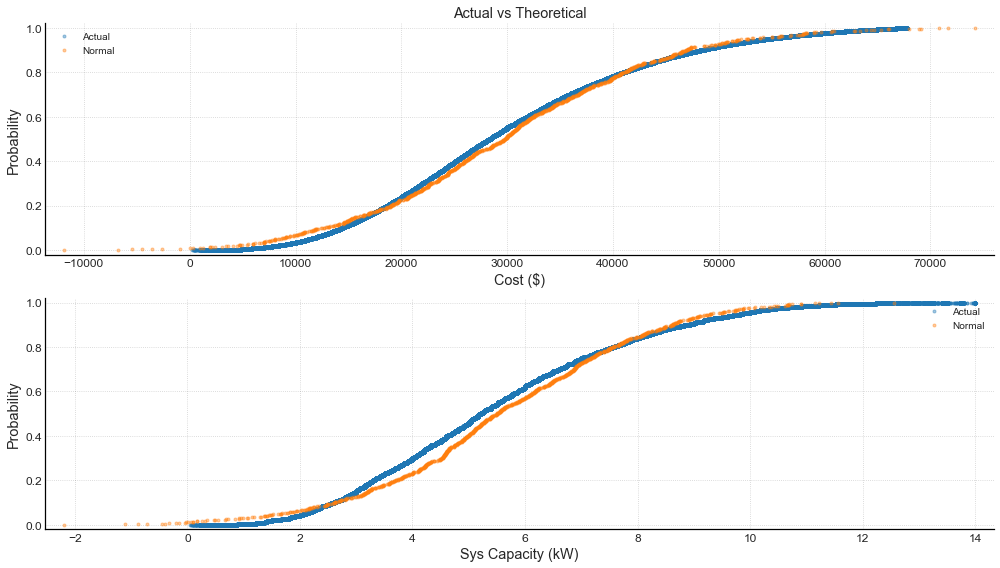

In [37]:
# NORMALITY TEST

ecdf_settings = {'marker': '.',
                 'linestyle': 'none',
                 'alpha': 0.4
                }

# compute mean and standard deviation of actual data
# use these statsitics to produce samples of normal distribution using numpy method np.random.normal

plt.subplots(1,2, figsize=(14,8))

# COST
col_name = 'cost'
cost_sample = sample_normal(col_name, 1000)

plt.subplot(211)
plt.plot(ecdf(clean_pv[col_name])[0],
         ecdf(clean_pv[col_name])[1],
         **ecdf_settings
        )
plt.plot(ecdf(cost_sample)[0],
         ecdf(cost_sample)[1],
         **ecdf_settings
        )
plt.ylabel('Probability')
plt.xlabel('Cost ($)')
plt.title('Actual vs Theoretical')
plt.legend(('Actual', 'Normal'))


# SIZE KW
col_name_2 = 'size_kw'
size_sample = sample_normal(col_name_2, 1000)

plt.subplot(212)
plt.plot(ecdf(clean_pv['size_kw'])[0],
         ecdf(clean_pv['size_kw'])[1],
         **ecdf_settings
        )
plt.plot(ecdf(size_sample)[0],
         ecdf(size_sample)[1],
         **ecdf_settings
        )
plt.ylabel('Probability')
plt.xlabel('Sys Capacity (kW)')
# plt.title('Actual vs Theoretical')
plt.legend(('Actual', 'Normal'))

plt.tight_layout()
plt.show()


## Transformations

Trying various transformations to achieve a normal distribution or close to it.

In [38]:
# clean_pv.info()

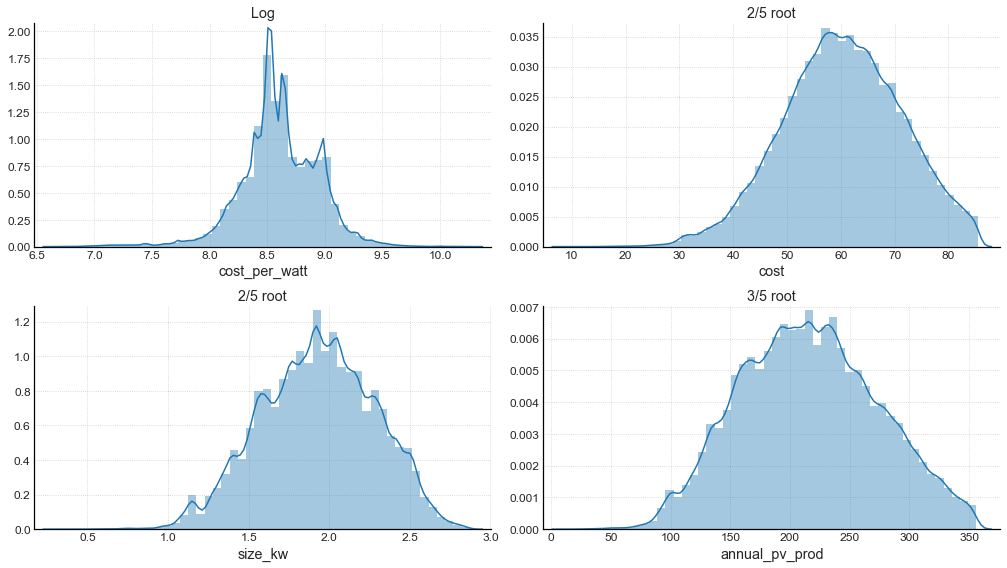

In [39]:
# distributions plot

plt.subplots(2,2, figsize=(14,8))

bins=50

plt.subplot(221)
sns.distplot(np.log(clean_pv.cost_per_watt.dropna()), bins=bins)
plt.title('Log')

plt.subplot(222)
sns.distplot(clean_pv.cost.dropna()**(2/5), bins=bins)
# sns.distplot(clean_pv.cost.dropna()**(1/3), bins=bins)
plt.title('2/5 root')

plt.subplot(223)
sns.distplot(clean_pv.size_kw.dropna()**(2/5), bins=bins)
plt.title('2/5 root')

plt.subplot(224)
sns.distplot(clean_pv.annual_pv_prod.dropna()**(3/5), bins=bins)
# sns.distplot(clean_pv.annual_pv_prod.dropna()**(1/2), bins=bins)
plt.title('3/5 root')

plt.tight_layout()

plt.show()

## Quantile Plots

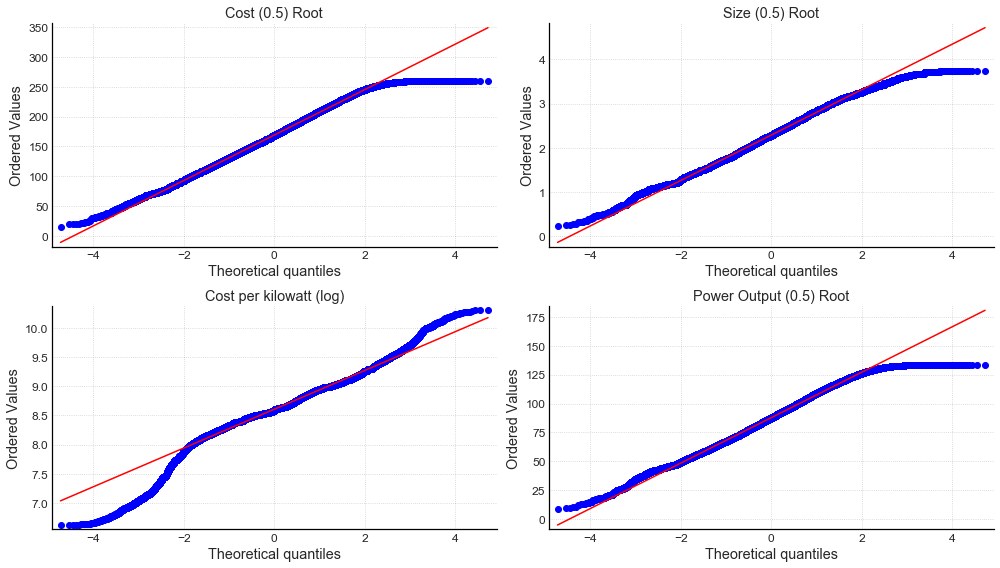

In [40]:
# quantile plots
t = 1/2
plt.subplots(2,2, figsize=(14,8))

plt.subplot(221)
stats.probplot((clean_pv['cost'])**(t), dist="norm", plot=plt)
plt.title(f'Cost ({t}) Root')

plt.subplot(222)
stats.probplot((clean_pv['size_kw'])**(t), dist="norm", plot=plt)
plt.title(f'Size ({t}) Root')

plt.subplot(223)
stats.probplot(np.log(clean_pv['cost_per_watt'].dropna()), dist="norm", plot=plt)
plt.title('Cost per kilowatt (log)')

plt.subplot(224)
stats.probplot((clean_pv['annual_pv_prod'].dropna())**(t), dist="norm", plot=plt)
plt.title(f'Power Output ({t}) Root')

plt.tight_layout()
plt.show()

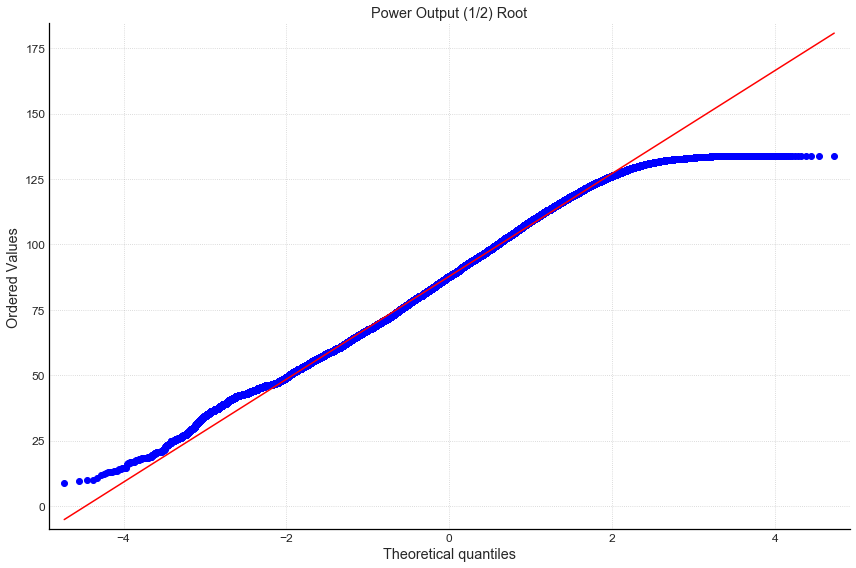

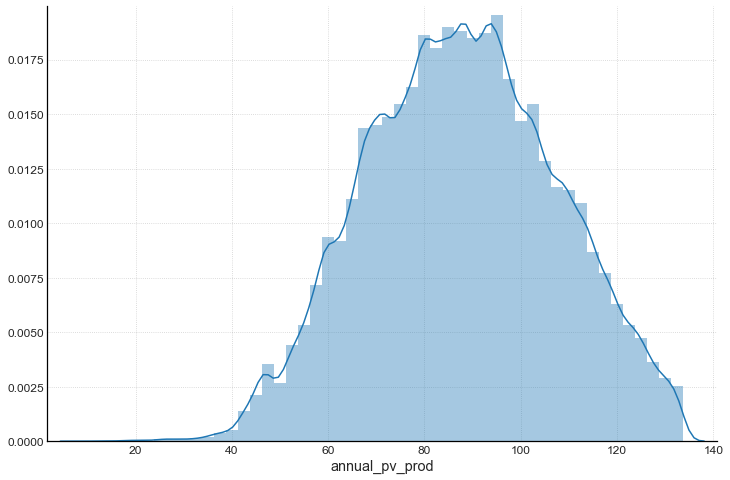

In [41]:
x = (clean_pv['annual_pv_prod'].dropna() ** (1/2))

stats.probplot(x, dist="norm", plot=plt)
plt.title('Power Output (1/2) Root')

plt.tight_layout()
plt.show()

sns.distplot(x)
plt.show()


The Q-Q plot allows for a comparison between quantiles of theoretical and actual distribution. After transformations, we can begin to make conclusions about the distribution of the actual data by comparing it to theoretical data. The actual data appears to come from a normal distribution within a range of (-2, 2) standard deviations but begins to deform when approaching three standard deviations. As a result, this could cause the machine learning model to lose accuracy when given features which are beyond two standard deviations.

# Normality Tests w/SciPy
**Null Hypothesis:** data is Gaussian

**Alt Hypothesis:** reject Null Hypothesis

alpha = 0.05

**p <= alpha:** reject Null Hypothesis, *data is not Gaussian*

**p > alpha:** fail to reject Null Hypothesis, *data is Gaussian*

In [42]:
def test_normality(onedim_array, test='normal', tx_pow=1, tx_func=1):
    """
    Input 1-dim array to test normality. By default the test will use SciPy's 
    .normaltest() method based on 
    
    Parameters:
    -----------
        1d_array: 1-dim array
        tx_pow: apply power transformation, default=1, no transfomation
        tx_func: apply other transformation, EX.: np.log(1d_array)
    Returns:
    -----------
    test statistic, p-value
    """
    mean = clean_pv['annual_pv_prod'].dropna().mean()
    std = clean_pv['annual_pv_prod'].dropna().std()
    size = len(clean_pv['annual_pv_prod'].dropna())
    if test == 'normal':
        return stats.normaltest(onedim_array)
    elif test == 'shapiro':
        return stats.shapiro(onedim_array)
  

In [64]:
# Null Hypothesis: data is Gaussian
# Alt Hypothesis: reject Null Hyp

In [43]:
mean = clean_pv['annual_pv_prod'].dropna().mean()
std = clean_pv['annual_pv_prod'].dropna().std()
size = len(clean_pv['annual_pv_prod'].dropna())
norm = np.random.normal(loc=mean, scale=std, size=size)
norm.mean()

8101.480988144705

In [44]:
power_dist = (clean_pv['annual_pv_prod'].dropna())**(1)
# x2 = np.random.normal()
stats.normaltest(norm)

NormaltestResult(statistic=0.23584748811642658, pvalue=0.8887638235530072)

In [63]:
x = stats.norm.rvs(loc=mean, scale=std, size=1000)
stats.normaltest(x)
stats.shapiro(x)

(0.9976463913917542, 0.16399312019348145)

# Hypothesis Test of Pearson Correlation

**Hypothesis:**
- **H0**: The observed correlation between system capacity and hardware cost occurred purely by chance
- **HA**: The observed correlation between system capacity and hardware cost didn't occur purely by chance
- **alpha**: 0.05


**Approach:**

1. simulate hypothesis that they are completely independent of each other
2. permute size/capacity; leave cost fixed
3. for each permutation(shuffling data), compute Pearson correlation
4. asses how many replicates have Pearson correlation greater than observed


In [46]:
def perm_pearson_hypothesis(var1, var2, data=clean_pv, size=1000):
    """
    1. Simulate hypothesis that two variables are completely independent of each other.
    2. Permute var1; leave var2 fixed
    3. For each permutation (shuffling data), compute Pearson correlation
    4. Asses how many replicates have Pearson correlation greater than observed
    
    Returns:
    --------
        tuple(observed correlation, p-value)
    """
    # observed correlation: r_obs
    r_obs = pearson_r(data[var1].values, data[var2].values)
    # initialize permutation replicates
    permutation_reps = np.empty(1000)
    # Draw replicates
    for i in range(1000):
        var1_permuted = np.random.permutation(data[var1].values)
        permutation_reps[i] = pearson_r(var1_permuted, data[var2].values)
    # Compute p-value
    return r_obs, np.sum(permutation_reps > r_obs)/len(permutation_reps)


In [47]:
r_obs, p_val = perm_pearson_hypothesis('cost', 'size_kw')
print('Observed correlation:', round(r_obs, 4))
print('p-val:', p_val)


Observed correlation: 0.7396
p-val: 0.0


In [48]:
r_obs, p_val = perm_pearson_hypothesis('cost', 'annual_pv_prod')
print('Observed correlation:', round(r_obs, 4))
print('p-val:', p_val)


Observed correlation: 0.7123
p-val: 0.0


The p-value of zero indicates that the probability of having the observed correlation (0.7382) occur purely by chance would be zero out of 10,000 samples. As a result, we must reject the null hypotheses and accept the alternative hypothesis that the correlation did not occur by random chance. 


## Bootstrap Pairs for Linear Regression
This computes the 95% confidence interval of slope and intercept acquired through linear regression

In [49]:
size = (clean_pv.size_kw.values) ** (2/5)
cost = (clean_pv.cost.values) ** (2/5)

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        # resample indices 'inds'
        bs_inds = np.random.choice(inds, size=len(inds))
        # new x,y arrays using resampled indices
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

# x, y - slope and intercept
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(size, cost, size=1000)

In [50]:
# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

[23.62831477 23.73077801]


In [51]:
# convert slope and intercept by raising to power (5/2)
print('Slope 95% CI:', np.percentile(bs_slope_reps**(5/2), [2.5, 97.5]))
print('Mean slope:', round((bs_slope_reps**(5/2)).mean(), 2))
print('Slope represents the change in price per kilowatt of system capacity')
print('\nIntercept 95% CI:', np.percentile(bs_intercept_reps**(5/2), [2.5, 97.5]))

Slope 95% CI: [2713.82519157 2743.34193282]
Mean slope: 2729.1
Slope represents the change in price for kilowatt of system capacity

Intercept 95% CI: [806.55287066 834.31074605]


In [52]:
# y = mx + b
(bs_slope_reps**(5/2)).mean() * 10 + (bs_intercept_reps**(5/2)).mean()

28111.178974096685

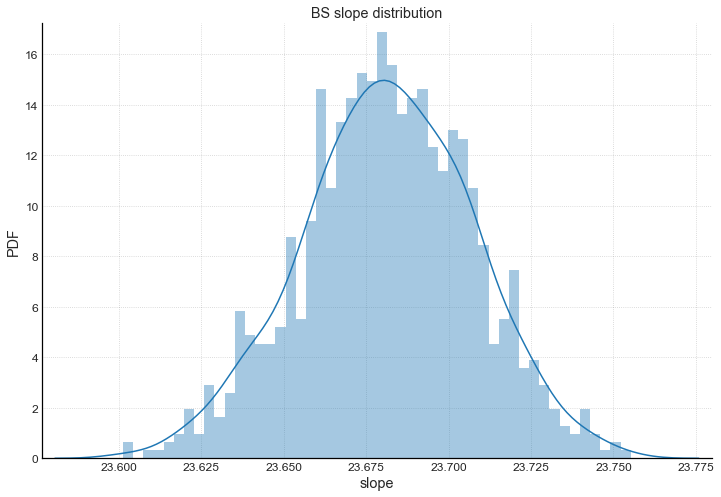

In [53]:
# Plot the histogram
sns.distplot(bs_slope_reps, bins=50)
plt.xlabel('slope')
plt.ylabel('PDF')
plt.title('BS slope distribution')
plt.show()

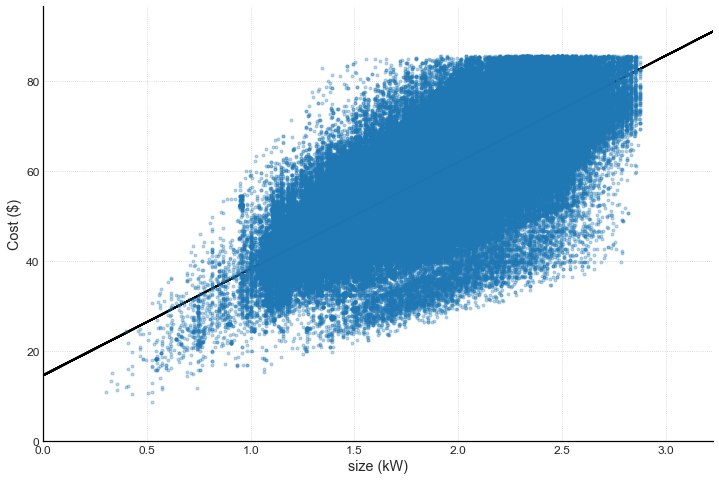

In [54]:
# visualize the variability in linear regression
# Generate array of x-values for bootstrap lines: x
x = np.array([0,10])

# Plot the bootstrap lines
for i in range(100):
     plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=1.2, color='black')

# Plot the data
plt.plot(size, cost, marker='.', linestyle='none', alpha=0.3)

# Label axes, set the margins, and show the plot
plt.xlabel('size (kW)')
plt.ylabel('Cost ($)')
plt.xlim([0,size.max()+size.std()])
plt.ylim([0, cost.max()+cost.std()])
plt.show()

In [55]:
# generate sample data and plot ECDF from BS sample

# for _ in range(20):
#     bs_sample = np.random.choice(cost**(5/2), size=len(cost))
#     x, y = ecdf(bs_sample)
#     _ = plt.plot(x, y, marker='.', linestyle='none',
#                  color='blue', alpha=0.1)

# x, y = ecdf(cost**(5/2))
# plt.plot(x, y, marker='.', color='k', alpha=0.3)
# plt.xlabel('Cost ($)')
# plt.ylabel('ECDF')
# plt.show()